## 1. Load the data set

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import RandomOverSampler


%matplotlib inline
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

C:\Users\kimwo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#import the dataset
path = "dataset\credit_card.csv"
df = pd.read_csv(path)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\kimwo\AppData\Local\Temp\ipykernel_17032\1620473683.py:2: SyntaxWarning: invalid escape sequence '\c'
  path = "dataset\credit_card.csv"


In [3]:
#check if the dataset is loaded 
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## 2. Pre-process and clean the dataset

In [4]:
#converr the columns name to lower case
print("Columns before lower case conversion:",df.columns.tolist())
print("*"*50)
df.columns = df.columns.str.lower()
print("Columns after lower case conversion:", df.columns.tolist())

Columns before lower case conversion: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
**************************************************
Columns after lower case conversion: ['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'class']


In [5]:
#check the info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    999 non-null    int64  
 1   v1      999 non-null    float64
 2   v2      999 non-null    float64
 3   v3      999 non-null    float64
 4   v4      999 non-null    float64
 5   v5      999 non-null    float64
 6   v6      999 non-null    float64
 7   v7      999 non-null    float64
 8   v8      999 non-null    float64
 9   v9      999 non-null    float64
 10  v10     999 non-null    float64
 11  v11     999 non-null    float64
 12  v12     999 non-null    float64
 13  v13     999 non-null    float64
 14  v14     999 non-null    float64
 15  v15     999 non-null    float64
 16  v16     999 non-null    float64
 17  v17     999 non-null    float64
 18  v18     999 non-null    float64
 19  v19     999 non-null    float64
 20  v20     999 non-null    float64
 21  v21     999 non-null    float64
 22  v2

For security reasons, the feature names have been anonymized as V1, V2, and so on. Since the "time" column is not relevant in this case, we will drop it in the section below.

In [6]:
#drop the time column
df.drop(columns=['time'])

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.284612,0.303073,-0.067909,0.930684,0.117387,-0.487005,0.204739,-0.174873,0.058270,0.015465,...,-0.023272,-0.043358,-0.209701,-0.446091,0.791745,-0.276971,0.009979,0.013268,14.05,0
995,-0.654892,0.608319,1.585102,-3.009429,0.037593,-1.954023,1.335977,-0.612858,0.690254,-1.681537,...,-0.078527,-0.064194,-0.107350,0.961776,-0.067760,-0.549465,-0.232588,-0.108261,3.90,0
996,-2.101171,-0.227365,1.624668,-0.291123,1.902446,-1.483921,-0.275117,0.085964,-0.563098,-0.376024,...,-0.313782,-0.804784,-0.474101,0.008102,0.259725,0.032376,0.323580,0.034622,1.78,0
997,-1.248163,0.315246,3.708935,0.687280,-0.873071,1.091287,0.297707,-0.633135,1.102317,2.536557,...,-0.824013,0.057907,-0.282351,0.630774,0.283506,-0.204264,0.097555,-0.670480,30.00,0


### Handle Missing Values

In [7]:
#check if any null or na values 
print("Check any null or na values in the dataset")
print("*"*50)
print("Check if column has any null\n", df.isnull().sum())

Check any null or na values in the dataset
**************************************************
Check if column has any null
 time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64


In [8]:
#There is no null or na values in the dataset.
#In the following cell, I will demonstrate how to Median apporach to handle null values if there some missing values in the "amount" column.
df_filled_mdeian = df.fillna(df.median(numeric_only=True))


### Handle Duiplicate Values

In [9]:
#check duiplicate values in each column and print the count of the duplicates
for col in df.columns:
    duiplicate_count = df[col].duplicated().sum()
    print(f"Column:{col}")
    print(f"Duiplicate count:{duiplicate_count}")
    print("*"*50)

Column:time
Duiplicate count:459
**************************************************
Column:v1
Duiplicate count:8
**************************************************
Column:v2
Duiplicate count:8
**************************************************
Column:v3
Duiplicate count:8
**************************************************
Column:v4
Duiplicate count:8
**************************************************
Column:v5
Duiplicate count:8
**************************************************
Column:v6
Duiplicate count:8
**************************************************
Column:v7
Duiplicate count:8
**************************************************
Column:v8
Duiplicate count:8
**************************************************
Column:v9
Duiplicate count:8
**************************************************
Column:v10
Duiplicate count:8
**************************************************
Column:v11
Duiplicate count:8
**************************************************
Column:v12
Duiplicate count:8
****

In [10]:
#Displat the dataframe having missing values
df_missing_values = df[df.isnull().any(axis=1)]
df_missing_values.shape

(0, 31)

The above result shows that no missing values were found in any of the 31 columns, and the section below further confirms this.

In [11]:
df_missing_values.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class


The result above means no missing values are found in the dataset 

### Handle outliners

In [12]:
#define a function to find outliers using IQR method 
def find_outliers_IQR(input_df, feature):
    IQR = input_df[feature].quantile(0.75) - input_df[feature].quantile(0.25)
    lower_limit = input_df[feature].quantile(0.25) - (IQR * 1.5)
    upper_limit = input_df[feature].quantile(0.75) + (IQR * 1.5)
    return lower_limit, upper_limit

In [13]:
#find lower and upper for amount
lower_limit, upper_limit = find_outliers_IQR(df, 'amount')
print(f"Lower limit for amount: {lower_limit}")
print(f"Upper limit for amount: {upper_limit}")

Lower limit for amount: -69.25
Upper limit for amount: 129.91


In [14]:
#remove outliers from the dataset
df_cleaned = df[(df['amount']>lower_limit) & (df['amount']<upper_limit)]

print(f"Cleaned dataset shape:{df_cleaned.shape}")
print(f"Outliers count: {len(df)- len(df_cleaned)}")

Cleaned dataset shape:(886, 31)
Outliers count: 113


In [15]:
#check the class distribution in the outliers 
outliers = df[(df['amount']< lower_limit)|(df['amount'] > upper_limit)]

class_count = outliers['class'].value_counts()
print(class_count)

class
0    112
1      1
Name: count, dtype: int64


By taking this approach, we identified 113 outliers in the amount column. Before starting feature engineering, we assume that amount may be a critical feature in the model.   
However, since the sample size is limited, particularly with only two fraudulent transactions recorded, we do not intend to remove any fraud transactions from the dataset in order to preserve model quality.

## 3. Exploratory Data Analysis (EDA)

In [16]:
#check the description of the cleaned dataset
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,371.094094,-0.183227,0.223254,0.874595,0.244180,-0.033066,0.153773,0.096336,-0.057624,-0.003532,...,0.001693,-0.123643,-0.040133,-0.000471,0.111585,0.026221,0.012225,-0.018865,66.488769,0.002002
std,223.071062,1.318391,1.154119,1.026587,1.255398,1.085276,1.235180,0.840845,0.876364,0.889223,...,0.624888,0.611385,0.356314,0.617137,0.429485,0.471693,0.319085,0.267677,187.356969,0.044721
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.980624,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.544209,-1.243924,-3.525281,-2.735623,0.000000,0.000000
25%,170.000000,-0.934040,-0.188004,0.308187,-0.487677,-0.563479,-0.630038,-0.334410,-0.174072,-0.493730,...,-0.219877,-0.542765,-0.178245,-0.364926,-0.167012,-0.304936,-0.047337,-0.023588,5.435000,0.000000
50%,368.000000,-0.376162,0.284236,0.888613,0.330125,-0.148269,-0.121924,0.088019,0.031283,-0.068274,...,-0.080414,-0.101469,-0.050821,0.089264,0.144624,0.004232,0.020370,0.020214,16.190000,0.000000
75%,559.000000,1.126413,0.866284,1.530569,1.069171,0.441114,0.476470,0.562220,0.252817,0.438249,...,0.083120,0.282102,0.073939,0.420973,0.419696,0.264192,0.109621,0.084280,55.225000,0.000000
max,755.000000,1.685314,5.267376,4.017561,4.861129,7.672544,5.122103,4.808426,3.877662,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.206820,3.087444,2.490503,1.575380,3828.040000,1.000000


In [17]:
#split the fraud and non-fraud transactions and check the distribution of the target variable
#In the dataset, 0 means non-fraud and 1 means fraud 
df_class_0 = df[df['class']==0]  #non-fraud transactions dataset
df_class_1 = df[df['class']==1]  #fraud transcations dataset 

print('Describe Amount Column of Non-fraud Dataset\n',df_class_0['amount'].describe())
print('-------------------------------------')
print('Describe Amount Column of Fraud Dataset\n',df_class_1['amount'].describe())

Describe Amount Column of Non-fraud Dataset
 count     997.000000
mean       66.091555
std       186.959217
min         0.000000
25%         5.450000
50%        16.190000
75%        55.000000
max      3828.040000
Name: amount, dtype: float64
-------------------------------------
Describe Amount Column of Fraud Dataset
 count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: amount, dtype: float64


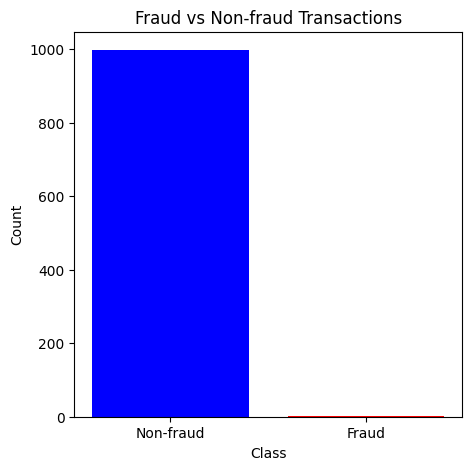

In [18]:
#plot the class distribution in the dataset 
class_count = df['class'].value_counts()
plt.figure(figsize = [5,5])
plt.bar(class_count.index, class_count.values, color = ['blue', 'red'], tick_label=['Non-fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraud vs Non-fraud Transactions')
plt.show()

From the above, we can see that the distribution of fraud and non-fraud transactions is highly imbalanced. There are 997 non-fraud transactions and only 2 fraud transactions, which means the quality of the model could be significantly impacted.  
Thus, we will use other tools to simulate some fraud dataset.

### Deal with the imbalance dataset 

As the class distribution is extemely imbalanced, in this section I will apply RandomOverSampler to increase the number of fraud transactions and ensure a more balanced dataset.

In [ ]:
#Use SMOTE to handle the imbalance dataset 
list = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'
       ]

X = df[list]
y = df['class']
print('The original dataset shape: %s' % Counter(y))

#re-sample the dataset using RandomOverSampler
ros = RandomOverSampler(random_state = 42)
X_res, y_res = ros.fit_resample(X, y)
print('The resampled dataset shape: %s' % Counter(y_res))

The original dataset shape: Counter({0: 997, 1: 2})
The resampled dataset shape: Counter({0: 997, 1: 997})


In [26]:
#Create a new dataframe using the resampled X and y
df_re = pd.DataFrame(X_res, columns = list)
df_re['class'] = y_res
df_re.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


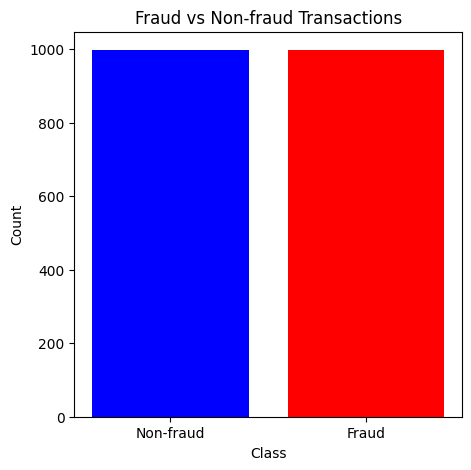

In [20]:
#Create the bin char to see the distribution of the target variable after re-sampling
class_count_res = y_res.value_counts()
plt.figure(figsize = [5,5])
plt.bar(class_count_res.index, class_count_res.values, color = ['blue', 'red'], tick_label=['Non-fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraud vs Non-fraud Transactions')
plt.show()

Now that the dataset has been re-sampled and balanced, we can proceed with feature engineering to identify which features may have a greater impact on the model’s performance.

In [27]:
#Standardard Scaler to Amount column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_re['amount'] = scaler.fit_transform(df_re[['amount']])

#### Correlation Bar Plot

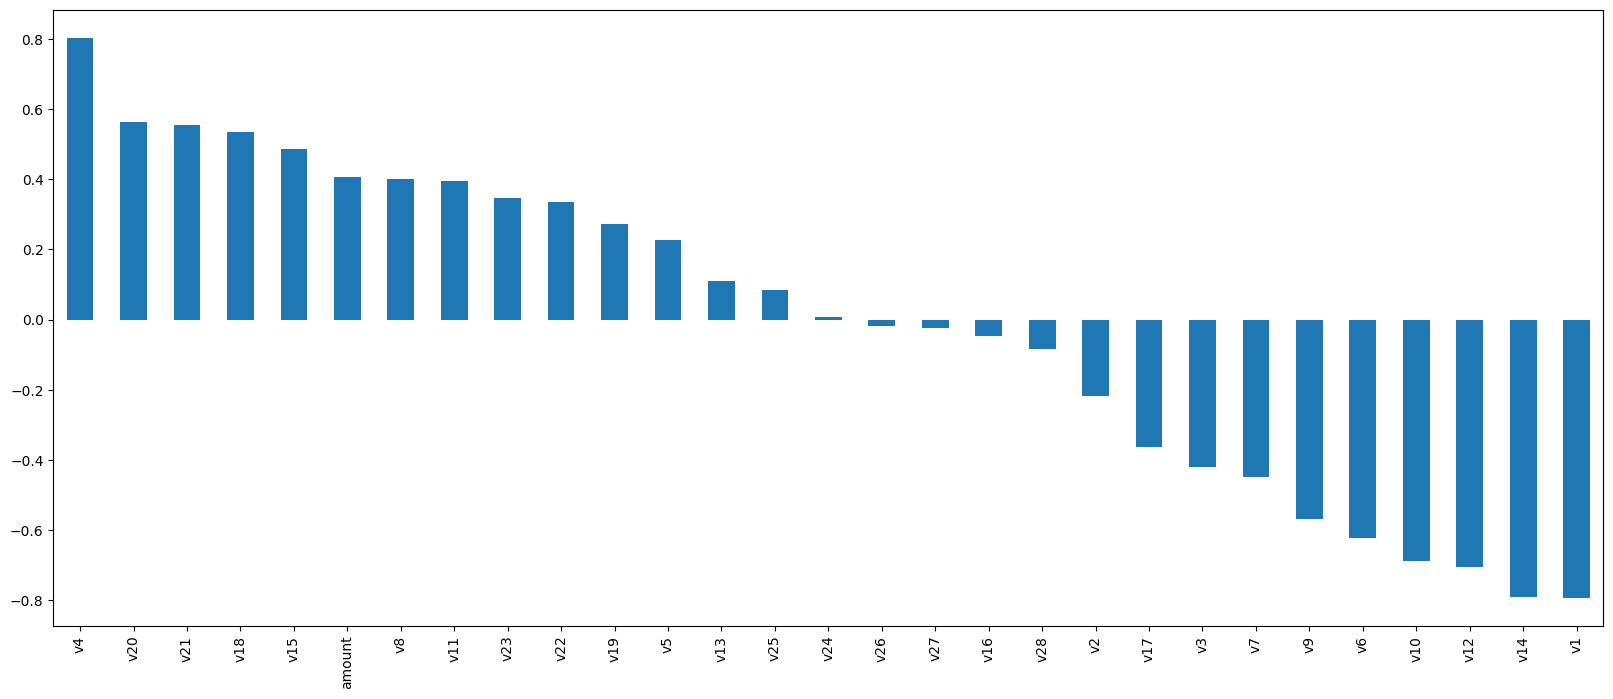

In [28]:
## Bar plot of Correlation with class 
plt.figure(figsize=(20,8))
df_re.corr()['class'].drop('class').sort_values(ascending = False).plot(kind='bar')
plt.show()

#### Pair Plot

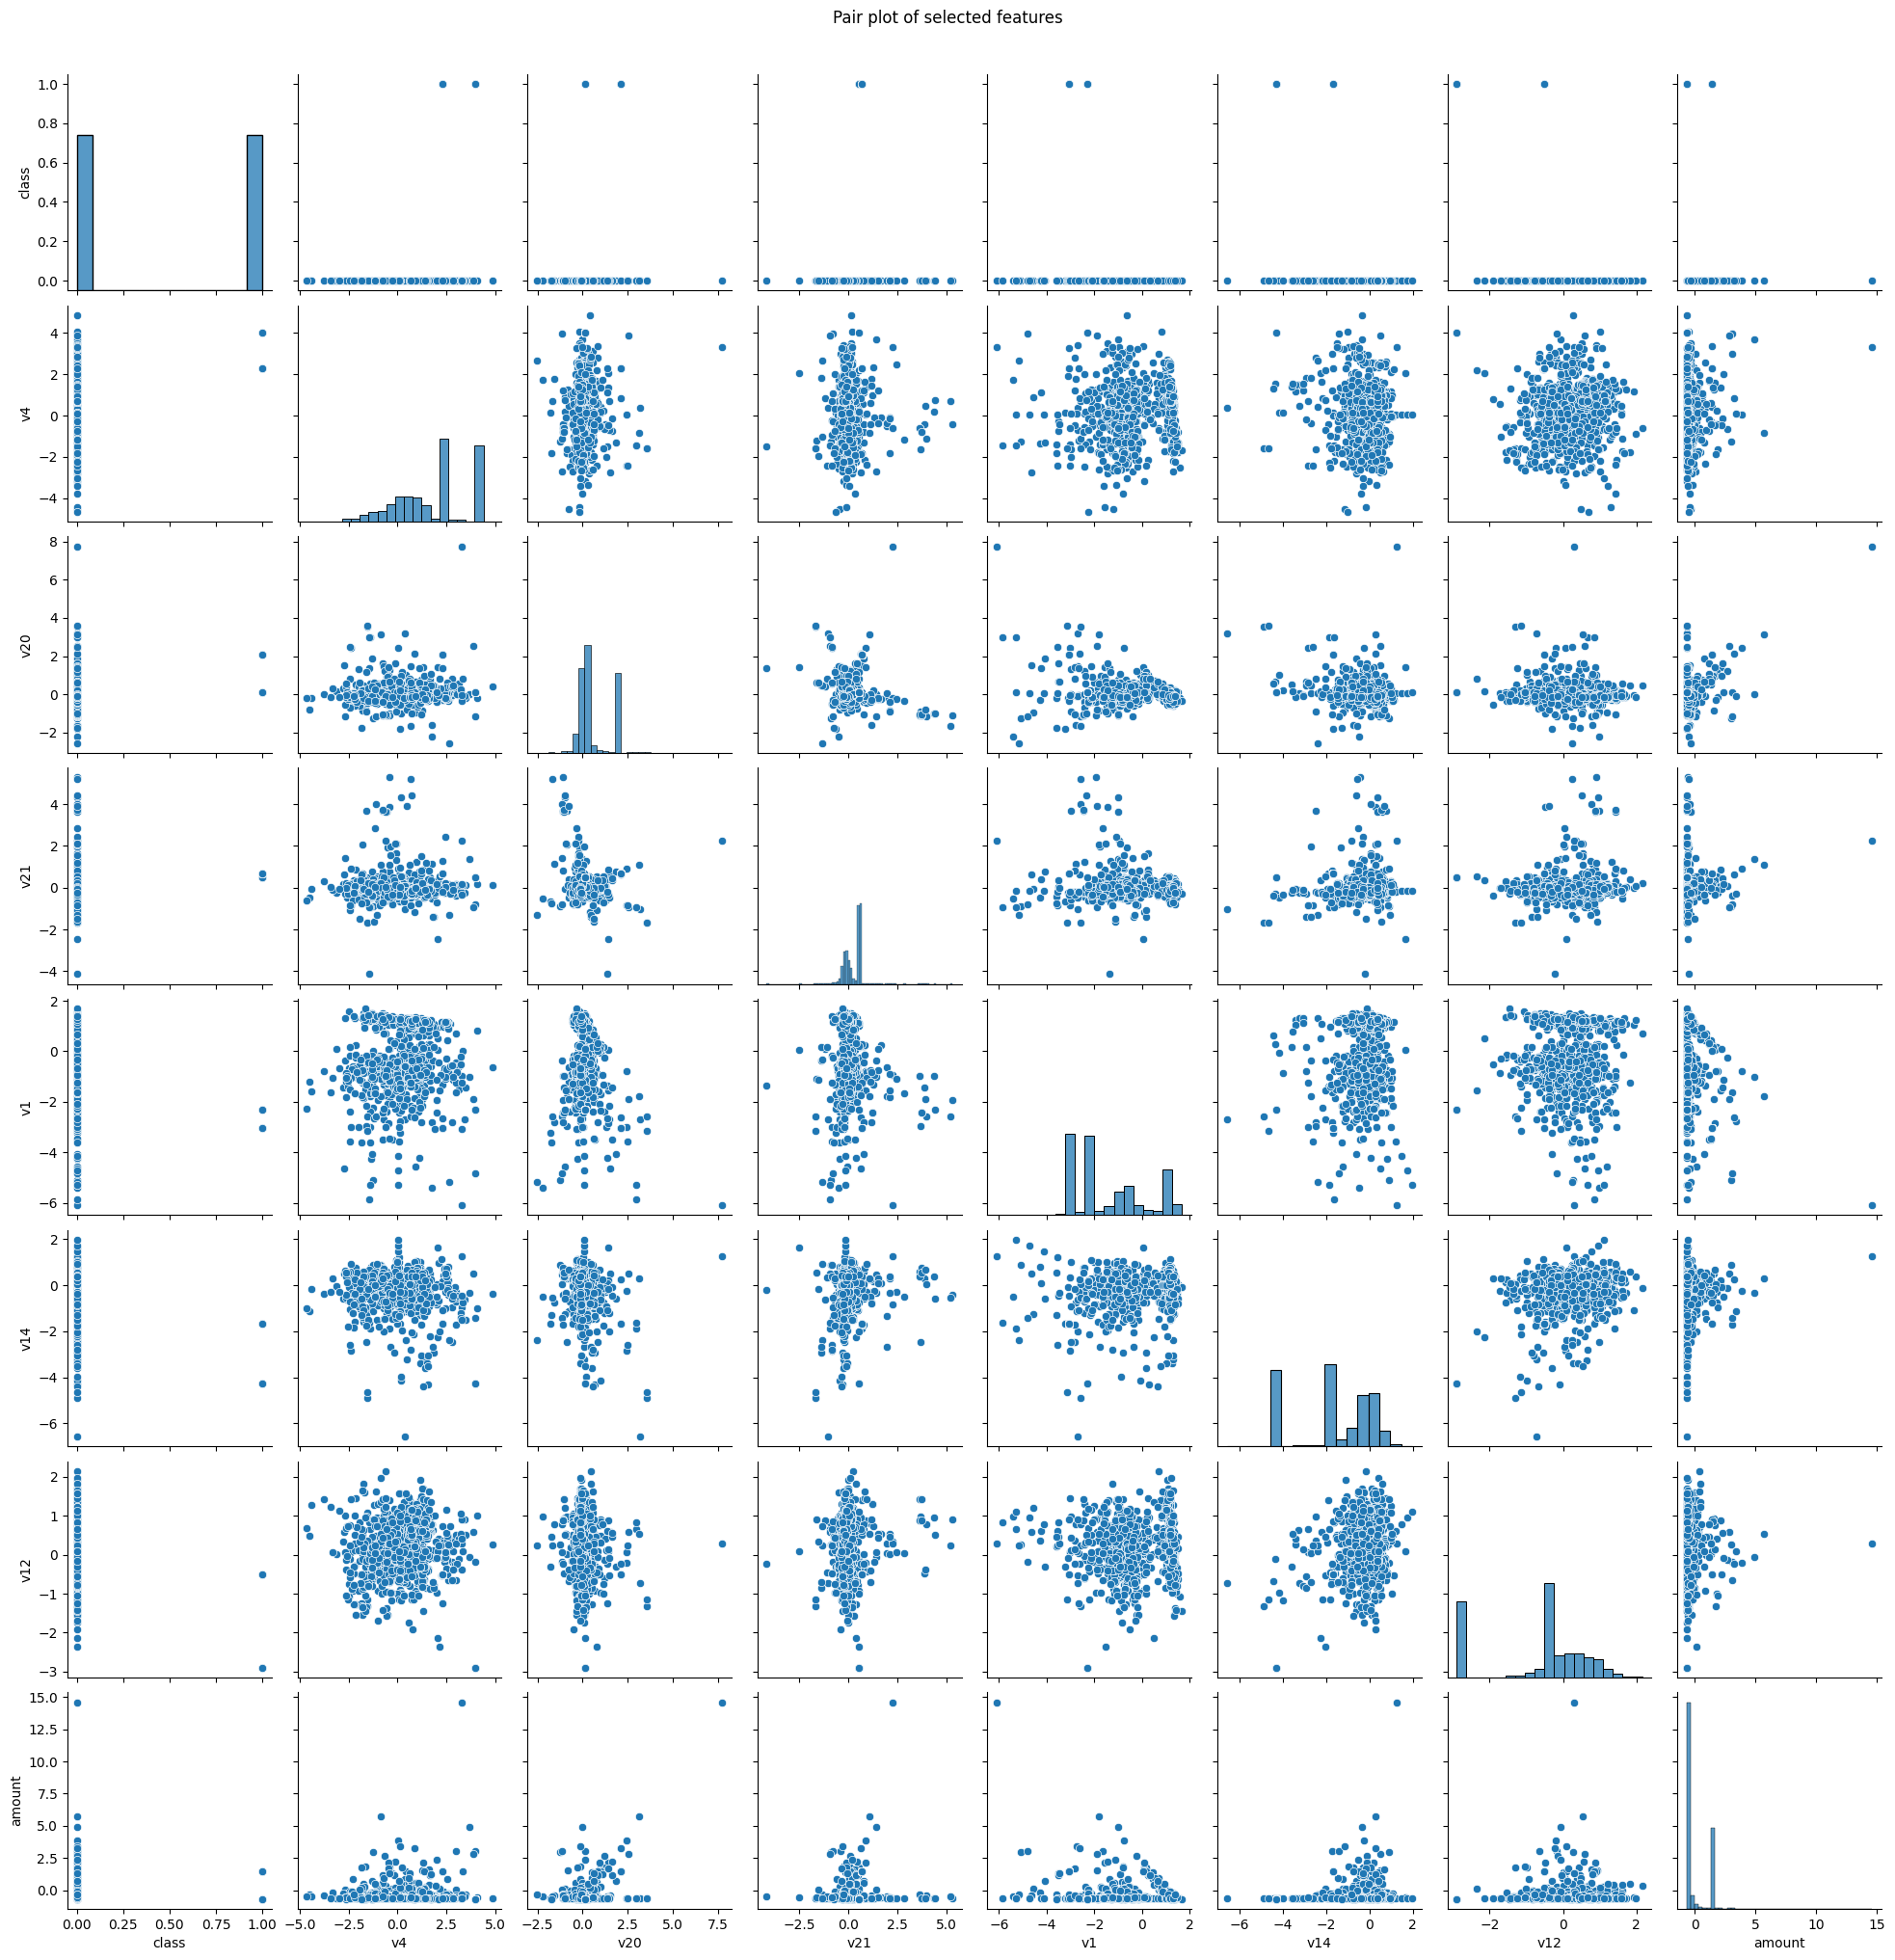

In [29]:
pair_plot = sns.pairplot(df_re[['class','v4', 'v20', 'v21', 'v1', 'v14', 'v12','amount']])
pair_plot.fig.suptitle("Pair plot of selected features", y=1.02)
plt.show()

As we can see from the above:  

1. V4, V20, and V21 have a stronger positive correlation with the target variable, which means that transactions with higher values in these features are more likely to be fraudulent.  

2. Meanwhile, V1, V14, and V12 have a stronger negative correlation with the target variable, which means that transactions with higher values in these features are less likely to be fraudulent.


### KDE plot - kernal Density Estimation 

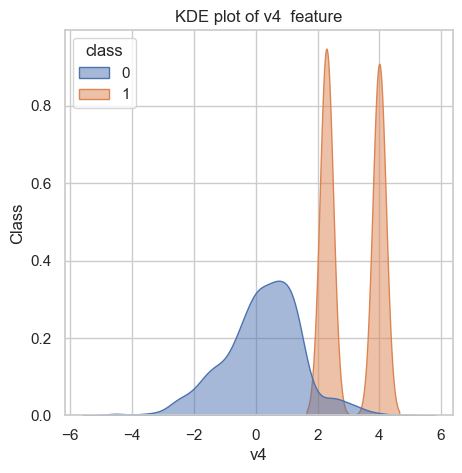

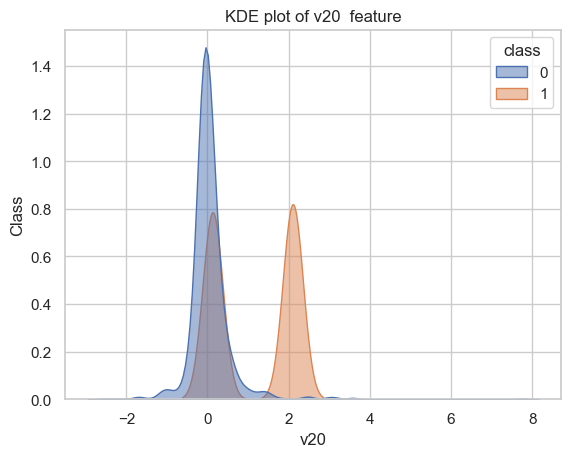

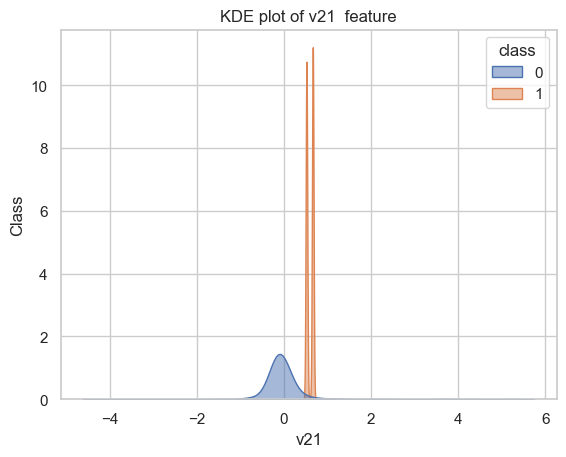

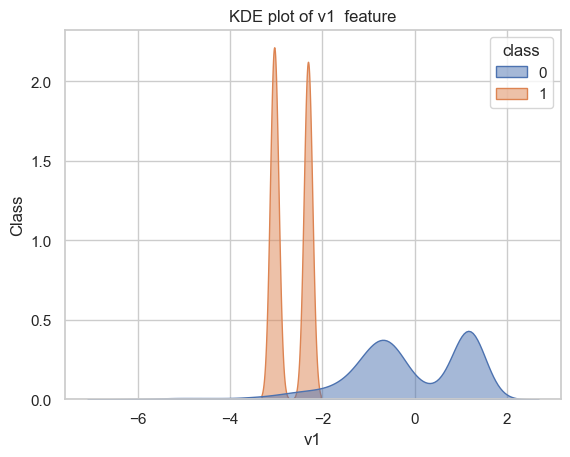

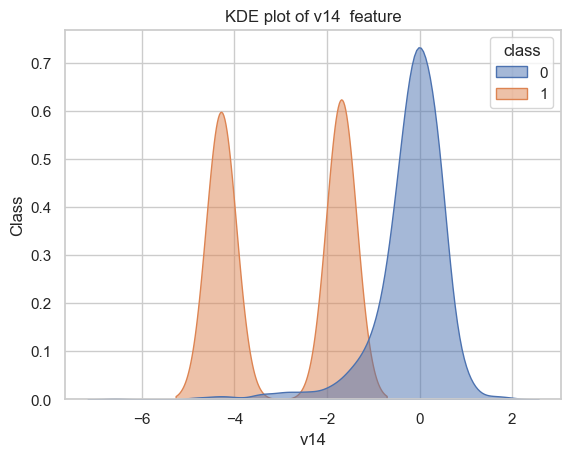

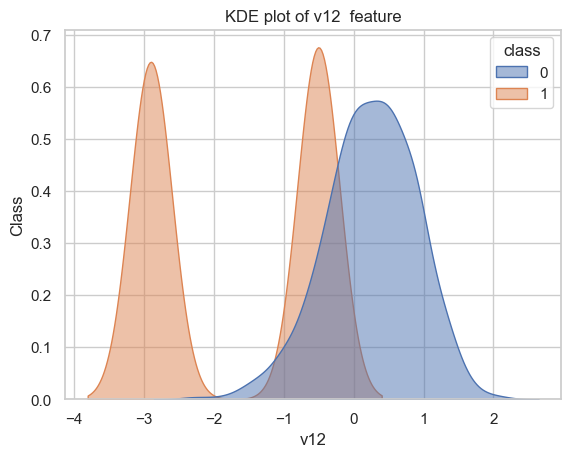

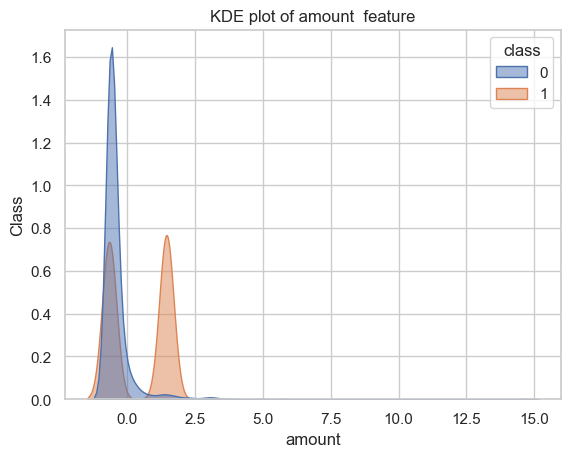

In [ ]:
#create line plot for the selected features to see the trend 

sns.set_theme(style='whitegrid')
plt.figure(figsize = (5,5))

for feature in ['v4', 'v20', 'v21', 'v1', 'v14', 'v12','amount']:
    sns.kdeplot(data=df_re, x=feature, hue="class", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"KDE plot of {feature}  feature")
    plt.xlabel(f'{feature}')
    plt.ylabel('Denisty')
    plt.show()

Insights:  


1. V4 has a strong positive impact on determining whether a transaction is fraudulent; if the value of V4 is around 2 to 4, the transaction is highly likely to be fraudulent.  

2. V20 and V21 also show a relatively positive impact on detecting fraud, but the correlation is less obvious.  

3. V1 has a stronger negative impact on fraud detection; if the value of V1 is between -2 and 2, the transaction is less likely to be fraudulent.  

4. V14 and V12 show some negative impact on classification, but the effect is not very pronounced.  

5. Overall, there is no clear and strong linear correlation across most features.

### Histrogram

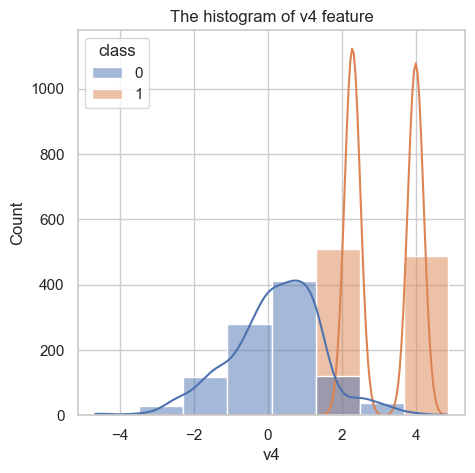

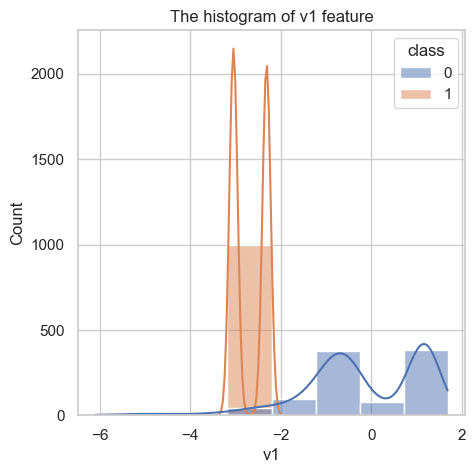

In [47]:
#Generate the histogram for V4 and V1
for feature in ['v4','v1']:
    plt.figure(figsize=(5,5))
    sns.histplot(data=df_re, x = feature, hue='class',bins= 8, kde=True)
    plt.title(f"The histogram of {feature} feature")
    plt.show()

Insights:   
1. In the V4 feature histogram, there are two sharp peaks around values 2 and 4. This further supports the finding that if a transaction’s V4 value is around 2 or 4, the transaction is highly likely to be fraudulent.  
2. In the V1 feature histogram, fraudulent transactions appear almost exclusively when V1 ≈ -3.5. This suggests that if a transaction’s V1 value falls between -2 and 2, it is much less likely to be fraudulent.

#### Violin plot

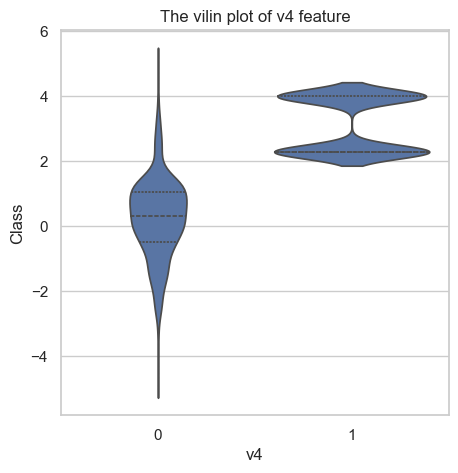

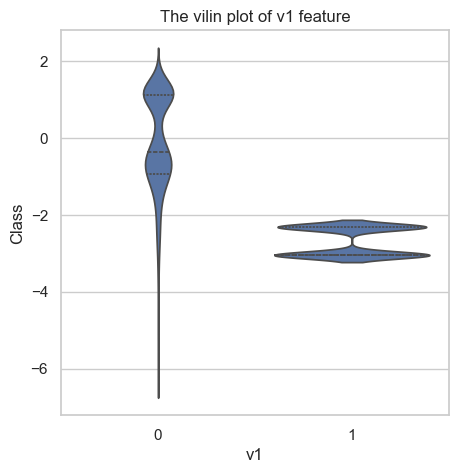

In [49]:
for feature in ['v4','v1']:
    plt.figure(figsize=(5,5))
    sns.violinplot(data=df_re, x = 'class', y=feature, inner='quartile')
    plt.title(f"The vilin plot of {feature} feature")
    plt.xlabel(f'{feature}')
    plt.ylabel('Class')
    plt.show()

Some questions to ask and answer:  
1. What feature(s) might determine if a transaction is fraudulent?  
    -- From the insights above, we can see that V4 has the strongest positive impact on detecting fraud (fraudulent transactions are highly concentrated around values 2 and 4), while V1 has the strongest negative impact (fraudulent transactions appear mostly around -3, and are absent in the 0–2 range). These features provide strong discriminative power in distinguishing fraud from non-fraud.

2. Who might be using this dataset? 
    -- This dataset could be used by bank security and fraud detection teams, data scientists, or researchers who are developing and testing models to identify fraudulent transactions. It is especially valuable for institutions that want to strengthen their real-time fraud monitoring systems.

3. Can we develop a model can immediately detect the fraud transcations and stop it?